In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [73]:
df = pd.read_csv('SeoulBikeData.csv').drop(["Date",  "Holiday", "Seasons", "Hour"], axis=1)
df['Functioning Day'] = (df['Functioning Day']=='Yes').astype(int) #one hot encoding y
df.head()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Functioning Day
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


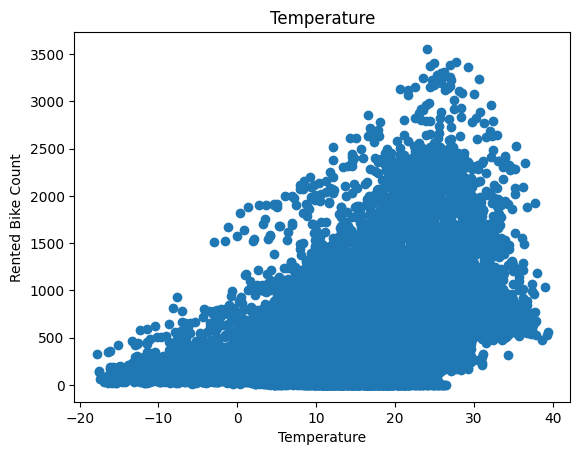

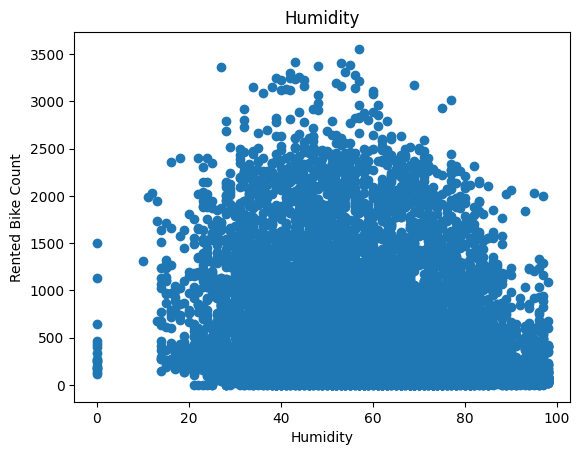

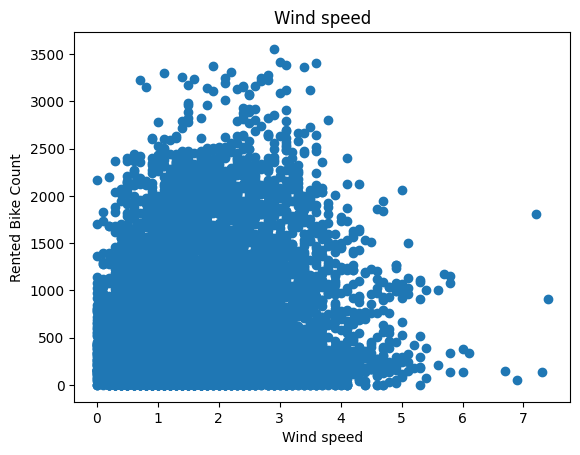

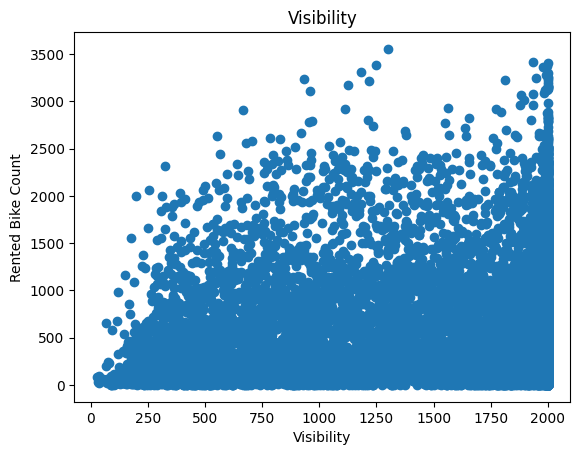

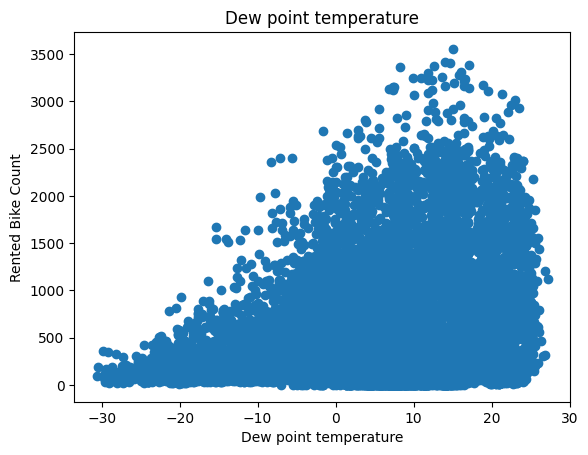

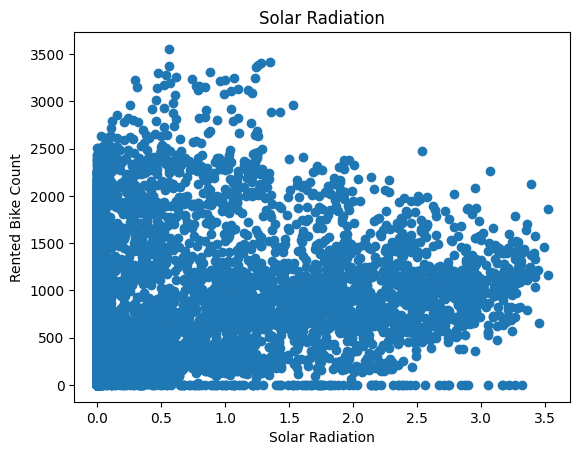

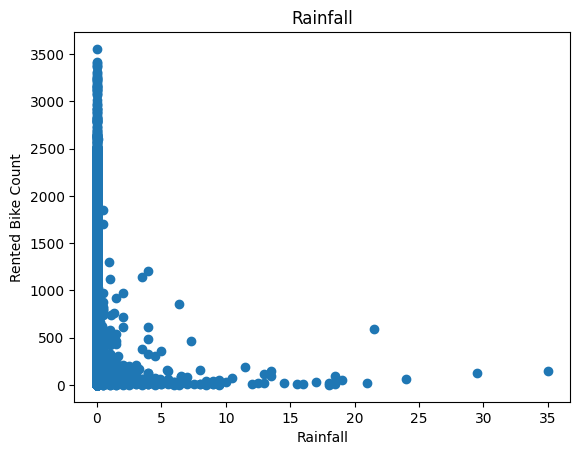

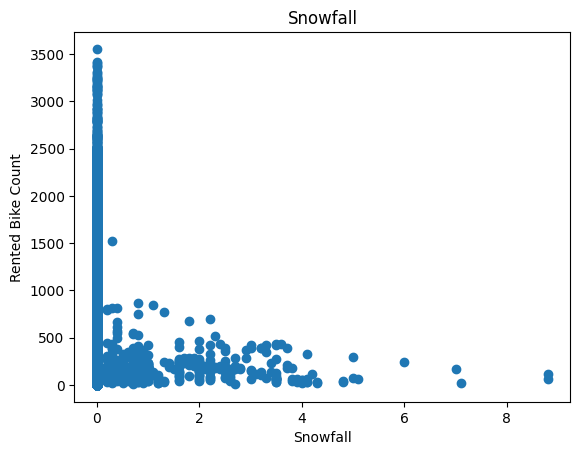

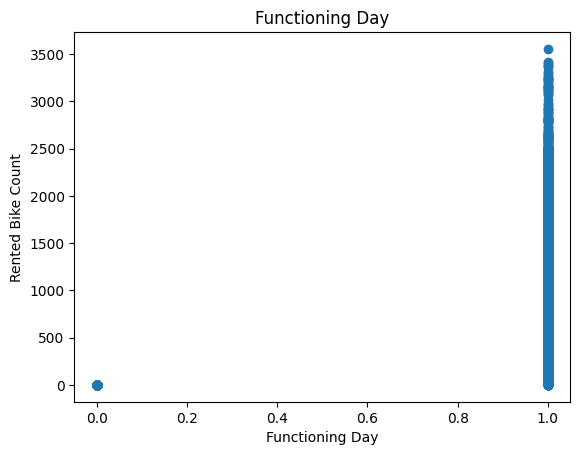

In [74]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['Rented Bike Count'])
    plt.title(label)
    plt.ylabel('Rented Bike Count')
    plt.xlabel(label)
    plt.show()

In [75]:
df = df.drop(['Functioning Day', 'Visibility', 'Wind speed'], axis=1)
df.head()

,Rented Bike Count,Temperature,Humidity,Dew point temperature,Solar Radiation,Rainfall,Snowfall
0,254,-5.2,37,-17.6,0.0,0.0,0.0
1,204,-5.5,38,-17.6,0.0,0.0,0.0
2,173,-6.0,39,-17.7,0.0,0.0,0.0
3,107,-6.2,40,-17.6,0.0,0.0,0.0
4,78,-6.0,36,-18.6,0.0,0.0,0.0


In [76]:
#Data split
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
print(len(train), len(valid), len(test))

5256 1752 1752


C:\Users\DrdrA\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [77]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None: #if x_label is none than take all the columns (sans y column)
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else: #if we want a specific x_label
        if len(x_labels) == 1: #if it's one,  just take one
            X = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            X = dataframe[x_labels].values
    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))
    return data, X, y

In [78]:
_, X_train_temp, y_train_temp = get_xy(df, "Rented Bike Count", x_labels=['Temperature'])
_, X_valid_temp, y_valid_temp = get_xy(df, "Rented Bike Count", x_labels=['Temperature'])
_, X_test_temp, y_test_temp = get_xy(df, "Rented Bike Count", x_labels=['Temperature'])

In [79]:
#Simple Regression Model
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)
temp_reg.score(X_test_temp, y_test_temp)

0.2900448841778286

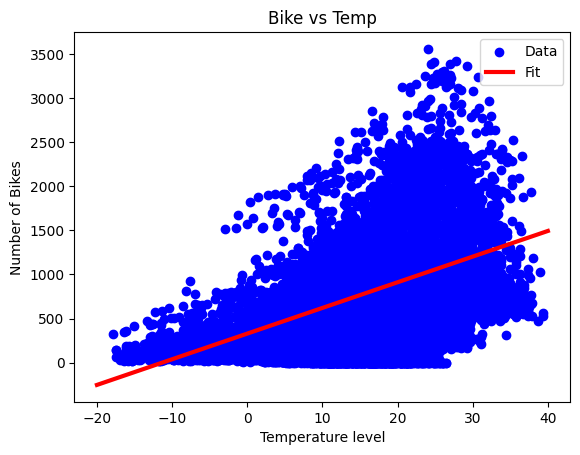

In [80]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color="blue")
x = tf.linspace(-20, 40, 100).numpy().reshape(-1, 1)
plt.plot(x, temp_reg.predict(x), label='Fit', color="red", linewidth=3)
plt.legend()
plt.title("Bike vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temperature level")
plt.show()

In [81]:
#Multiple Linear Regression
_, X_train, y_train = get_xy(df, "Rented Bike Count", x_labels=df.columns[1:])
_, X_valid, y_valid = get_xy(df, "Rented Bike Count", x_labels=df.columns[1:])
_, X_test, y_test = get_xy(df, "Rented Bike Count", x_labels=df.columns[1:])

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
reg_model.score(X_test, y_test)

0.39203341310690387